In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from codeStore import support_fun as spf
import importlib
PWD = os.getcwd()

## sphereNearPlane, vary epsilon and h2Plane

In [21]:
use_node = 3
njob_node = 1
n_job_pbs = use_node * njob_node
random_order = True
n_job_pbs = 10000

def comm_sphereNearPlane(sm, epsilon, rs, ds, es, h2Plane, 
                         ksp_max_it, ksp_rtol, ksp_atol, f): 
    if 'rs' in sm:
        err_msg = 'the regularized family methods requires eh==0. '
        assert np.isclose(es, 0), err_msg
    
    assert sm is 'rs_plane'
    assert rs < h2Plane
    
    main_fun = 'main_resistanceMatrix' 
    ts = 'mpirun -np 48 python ../sphereNearPlane.py  -%s 1 ' % main_fun
    ts = ts + ' -sm %s -epsilon %f ' % (sm, epsilon)
    ts = ts + ' -rs %f -ds %f -es %f -h2Plane %f ' % (rs, ds, es, h2Plane)
    ts = ts + ' -ksp_max_it %d -ksp_rtol %e -ksp_atol %e -f %s' % (ksp_max_it, ksp_rtol, ksp_atol, f)
    return ts

write_pbs_head = spf.write_pbs_head_haiguang
sm = 'rs_plane'
rs, ds, es = 1, 0.03, 0
ksp_max_it, ksp_rtol, ksp_atol = 1000, 1e-10, 1e-100
epsilon_list = np.linspace(0.1, 1, 10)
h2Plane_list = np.hstack((np.linspace(1.1, 1.9, 9), np.linspace(2, 9, 8), 
                          np.linspace(10, 100, 19)[:-1], np.linspace(100, 1000, 19)))
job_dir = 'sphereNearPlane_a'
use_node = 1

###############################################################################################
# generate all comment file. 
comm_list = []
txt_list = []
h2Plane_list, epsilon_list = np.meshgrid(h2Plane_list, epsilon_list)
for h2Plane, epsilon in zip(h2Plane_list.ravel(), epsilon_list.ravel()):
    f = 'h%.4f_epsilon%.4f' % (h2Plane, epsilon)
    ts = comm_sphereNearPlane(sm, epsilon, rs, ds, es, h2Plane, 
                              ksp_max_it, ksp_rtol, ksp_atol, f)
    comm_list.append(ts)
    txt_list.append(f)
spf.write_main_run_comm_list(comm_list, txt_list, use_node, njob_node, job_dir, 
                             write_pbs_head, n_job_pbs, random_order=random_order)

exist folder /home/zhangji/stokes_flow_master/sphereNearPlane/sphereNearPlane_a
input 540 cases.
generate 1 pbs files in total.
 --->>random order mode is ON. 
Command of first case is:
mpirun -np 48 python ../sphereNearPlane.py  -main_resistanceMatrix 1  -sm rs_plane -epsilon 0.200000  -rs 1.000000 -ds 0.030000 -es 0.000000 -h2Plane 1.300000  -ksp_max_it 1000 -ksp_rtol 1.000000e-10 -ksp_atol 1.000000e-100 -f h1.3000_epsilon0.2000


True

## two sphere with or without plane

In [5]:
use_node = 3
njob_node = 1
n_job_pbs = use_node * njob_node
random_order = True
n_job_pbs = 10000

def comm_twoSsphere(sm, epsilon, rs, ds, es, h2Plane, 
                    move_x, move_y, move_z, 
                    ksp_max_it, ksp_rtol, ksp_atol, f): 
    if 'rs' in sm:
        err_msg = 'the regularized family methods requires eh==0. '
        assert np.isclose(es, 0), err_msg
    
    assert (sm is 'rs_plane') or (sm is 'rs')
    assert rs < h2Plane
    
    main_fun = 'main_resistanceMatrix_twoSphere' 
    ts = 'mpirun -np 64 python ../sphereNearPlane.py  -%s 1 ' % main_fun
    ts = ts + ' -sm %s -epsilon %f ' % (sm, epsilon)
    ts = ts + ' -rs %f -ds %f -es %f -h2Plane %f ' % (rs, ds, es, h2Plane)
    ts = ts + ' -move_x %f -move_y %f -move_z %f ' % (move_x, move_y, move_z)
    ts = ts + ' -ksp_max_it %d -ksp_rtol %e -ksp_atol %e -f %s' % (ksp_max_it, ksp_rtol, ksp_atol, f)
    return ts

# write_pbs_head = spf.write_pbs_head_haiguang
# sm, epsilon = 'rs_plane', 0.3
# rs, ds, es = 1, 0.03, 0
# ksp_max_it, ksp_rtol, ksp_atol = 1000, 1e-10, 1e-100
# move_y, move_z = 0, 0 
# move_x_list = np.array((1.25, 2, 2.5, 3))
# # h2Plane_list = np.hstack((np.linspace(1.1, 1.9, 9), np.linspace(2, 9, 8), 
# #                           np.linspace(10, 100, 19)[:-1], np.linspace(100, 1000, 19)))
# h2Plane_list = np.array(1.5)
# job_dir = 'twoSphereNearPlane_b'
# njob_node, use_node = 1, 1

write_pbs_head = spf.write_pbs_head_haiguang
sm, epsilon = 'rs', 0.3
rs, ds, es = 1, 0.03, 0
ksp_max_it, ksp_rtol, ksp_atol = 1000, 1e-10, 1e-100
move_y, move_z = 0, 0 
move_x_list = np.array((1.25, 2, 2.5, 3))
# h2Plane_list = np.hstack((np.linspace(1.1, 1.9, 9), np.linspace(2, 9, 8), 
#                           np.linspace(10, 100, 19)[:-1], np.linspace(100, 1000, 19)))
h2Plane_list = np.array(1.5)
job_dir = 'twoSphere_b'
njob_node, use_node = 1, 1

###############################################################################################
# generate all comment file. 
comm_list = []
txt_list = []
move_x_list, h2Plane_list = np.meshgrid(move_x_list, h2Plane_list)
for move_x, h2Plane in zip(move_x_list.ravel(), h2Plane_list.ravel()):
    f = 'h%.4f_movex%.4f' % (h2Plane, move_x)
    ts = comm_twoSsphere(sm, epsilon, rs, ds, es, h2Plane, 
                         move_x, move_y, move_z, 
                         ksp_max_it, ksp_rtol, ksp_atol, f)
    comm_list.append(ts)
    txt_list.append(f)
spf.write_main_run_comm_list(comm_list, txt_list, use_node, njob_node, job_dir, 
                             write_pbs_head, n_job_pbs, random_order=random_order)

make folder /home/zhangji/stokes_flow_master/sphereNearPlane/twoSphere_b
input 4 cases.
generate 1 pbs files in total.
 --->>random order mode is ON. 
Command of first case is:
mpirun -np 48 python ../sphereNearPlane.py  -main_resistanceMatrix_twoSphere 1  -sm rs -epsilon 0.300000  -rs 1.000000 -ds 0.030000 -es 0.000000 -h2Plane 1.500000  -move_x 2.000000 -move_y 0.000000 -move_z 0.000000  -ksp_max_it 1000 -ksp_rtol 1.000000e-10 -ksp_atol 1.000000e-100 -f h1.5000_movex2.0000


True

array([ 1,  2,  4,  8, 16])

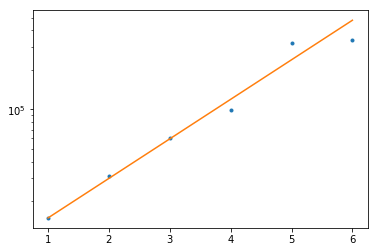

In [13]:
from matplotlib import pyplot as plt
import numpy as np

prc0 = np.array((14900, 30800, 60800, 99300, 318800, 336900))
level = np.arange(prc0.size) + 1
# level = np.array((1,  2,    3,     4,     5     ))

prc1 = prc0[0] * (2 ** (level - level[0]))
plt.semilogy(level, prc0, '.')
plt.semilogy(level, prc1)